In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape((60000, 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((10000, 28 * 28)).astype("float32") / 255

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 5
    return initial_lr * (drop ** (epoch // epochs_drop))

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)

model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[lr_scheduler])


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8083 - loss: 1.2451 - val_accuracy: 0.9360 - val_loss: 0.5768 - learning_rate: 0.0100
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8838 - loss: 0.7298 - val_accuracy: 0.9242 - val_loss: 0.5614 - learning_rate: 0.0100
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8827 - loss: 0.7001 - val_accuracy: 0.9312 - val_loss: 0.5287 - learning_rate: 0.0100
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8810 - loss: 0.6916 - val_accuracy: 0.9299 - val_loss: 0.5288 - learning_rate: 0.0100
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8867 - loss: 0.6545 - val_accuracy: 0.9358 - val_loss: 0.5058 - learning_rate: 0.0100
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9079 - loss: 0.5350 - val_accuracy: 0.9507 - val_loss: 0.3366 - learning_rate: 0.0050
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9118 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9652 - loss: 0.2027
Test Accuracy: 0.9690
Test Loss: 0.1882


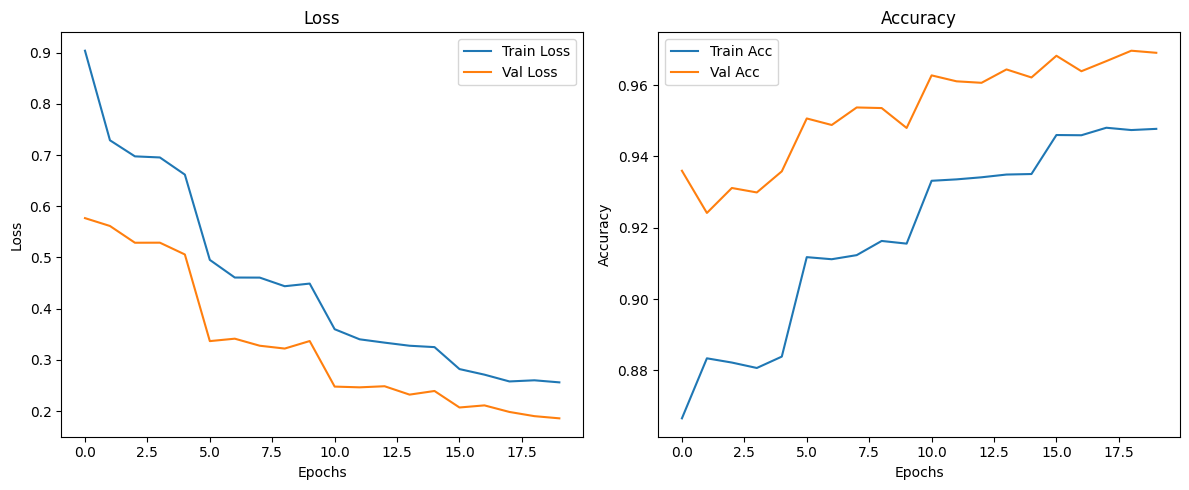

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


I added Dropout and L2 regularization to our MNIST model to make it perform better. Dropout turns off some neurons during training, and L2 keeps the weights small. This helped the model not just memorize the training data but also do well on new data. Because of this, both training and validation losses were lower and closer together.

Used a learning rate scheduler that slowly reduced the learning rate as training went on. This helped the model learn more smoothly and avoid making big jumps in the wrong direction. In the end, the model became more stable and gave better results on unseen data.
